In [1]:
# This is a report using the data from IQAASL.
# IQAASL was a project funded by the Swiss Confederation
# It produces a summary of litter survey results for a defined region.
# These charts serve as the models for the development of plagespropres.ch
# The data is gathered by volunteers.
# Please remember all copyrights apply, please give credit when applicable
# The repo is maintained by the community effective January 01, 2022
# There is ample opportunity to contribute, learn and teach
# contact dev@hammerdirt.ch

# Dies ist ein Bericht, der die Daten von IQAASL verwendet.
# IQAASL war ein von der Schweizerischen Eidgenossenschaft finanziertes Projekt.
# Es erstellt eine Zusammenfassung der Ergebnisse der Littering-Umfrage für eine bestimmte Region.
# Diese Grafiken dienten als Vorlage für die Entwicklung von plagespropres.ch.
# Die Daten werden von Freiwilligen gesammelt.
# Bitte denken Sie daran, dass alle Copyrights gelten, bitte geben Sie den Namen an, wenn zutreffend.
# Das Repo wird ab dem 01. Januar 2022 von der Community gepflegt.
# Es gibt reichlich Gelegenheit, etwas beizutragen, zu lernen und zu lehren.
# Kontakt dev@hammerdirt.ch

# Il s'agit d'un rapport utilisant les données de IQAASL.
# IQAASL était un projet financé par la Confédération suisse.
# Il produit un résumé des résultats de l'enquête sur les déchets sauvages pour une région définie.
# Ces tableaux ont servi de modèles pour le développement de plagespropres.ch
# Les données sont recueillies par des bénévoles.
# N'oubliez pas que tous les droits d'auteur s'appliquent, veuillez indiquer le crédit lorsque cela est possible.
# Le dépôt est maintenu par la communauté à partir du 1er janvier 2022.
# Il y a de nombreuses possibilités de contribuer, d'apprendre et d'enseigner.
# contact dev@hammerdirt.ch

# sys, file and nav packages:
import os
import datetime as dt
import csv, json

# math packages:
import pandas as pd
import numpy as np
import datetime as dt

# charting:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import ticker

from PIL import Image as PILImage
from IPython.display import Markdown as md
from IPython.display import display
import matplotlib.image as mpimg

# home brew utitilties
import resources.sr_ut as sut
import resources.chart_kwargs as ck

# when setting the code group names the defintions
# are pushed to .JSON format
def push_this_to_json(filename="", data=[]):
    with open(filename, "w") as a_file:
        json.dump(data, a_file)

(codegroups)=
# Code groups

<a href="baselines_de.html"> Deutsch </a>

The IQAASL project used the item codes and descriptions from the Marine Strategy Framework (MSFD) master list  {cite}`mlwguidance`.      Item identification follows the protocols from the MSFD Technical Subgroup on Marine Litter. The master list was developed based on the categories of items used in a series of programs and is one of the most detailed, representing established EU protocols. There are 217 identification codes to classify all objects collected from a survey. The item codes begin with G1 and end with G217. 

## Accounting for regional objects

There are items identified regularly in Switzerland that do not appear in the master list. To account for this 43 codes were added to the master list under the parent code G124. These codes begin with G900 and end with G999. 

Some MSFD codes such as G124 other plastic/polystyrene items, identifiable allows for quantification of unlisted identifiable plastic items. An added item such as G913 pacifier can be quantified independently and linked to the MSFD code G124. This work is done at the server and the data can be analyzed using either form. 

Identifiable plastic objects were either attributed to an additional code such as G913, or if no other code described the item then G124 was used. Some codes were included to capture pandemic related items such as: 

* G901 Mask medical, synthetic (Parent code (G124) other plastic/polystyrene items identifiable)
* G902 Mask medical, cloth (Parent code (G145) other textiles) 

__Codes and parent codes:__ accounting for regional differences. G902 is linked to G145 by the value in the column parent_code. G937 is linked to G124 by the parent code.

In [2]:
# aggregated survey data
dfAgg = pd.read_csv("resources/checked_before_agg_sdata_eos_2020_21.csv")
dfAgg["date"] = pd.to_datetime(dfAgg["date"])

# get the data:
dfCodes = pd.read_csv("resources/codes_with_group_names_2015.csv")
dfCodes["parent_code"] = dfCodes.parent_code.where(dfCodes.parent_code != "Parent code", "none")

cols_to_display = ["code", "description","groupname",  "parent_code"]

dfCodes[dfCodes.code.isin(["G124", "G902", "G145","G937"])][cols_to_display].set_index("code")

description       groupname parent_code
code                                                            
G145                  Other textiles  personal items        none
G902             Mask medical, cloth  personal items        G145
G124  Other plastic or foam products    unclassified        none
G937   Pheromone baits for vineyards     agriculture        G124

### Modification of items by size and material descriptions

Several important size and material modifications were
made specifically to the fragmented plastic and foamed
plastic categories. Other modifications include expansion
or narrowing of item descriptions.

* G96 sanitary towels, panty liners modified to include plastic tampon applicators.
* G211 adhesive bandages modified from unclassified material to plastic.

To best identify and quantify micro plastics for this project 3 codes were modified by size from the _master list_.

Codes modified to account for objects less than 5mm:

* G75 Plastic/polystyrene pieces 0 - 2.5 cm modified to 0.5 cm - 2.5 cm
* G78 Plastic pieces 0 - 2.5cm modified to 0.5cm - 2.5cm
* G81 Polystyrene pieces 0 - 2.5cm modified to 0.5 cm - 2.5 cm


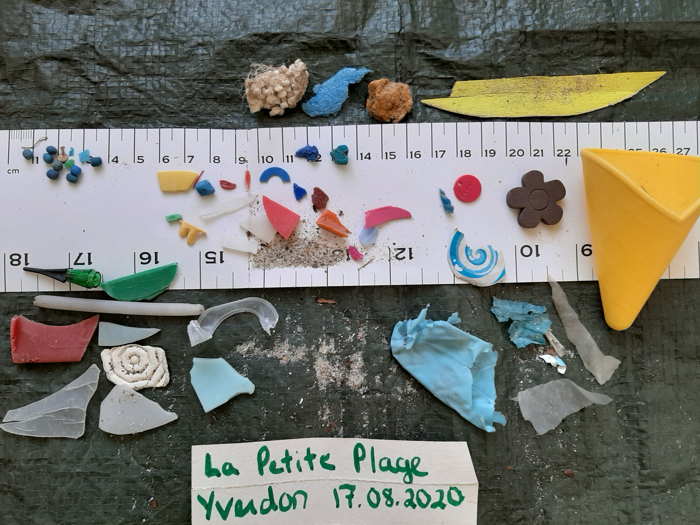

In [3]:
sut.display_image_ipython("resources/images/codegroups/20200819_080041.jpg", thumb=(700,1100), rotate=0)

*Various sizes of plastic pieces*

In [4]:
# directory listing of the group definitions
code_group2 = {
    "waste water": "wastewater.json" ,
    "micro plastics (< 5mm)":"codeListMicros.json",
    "infrastructure":"construction2.json",
    "food and drink":"foodstuff.json",
    "agriculture":"ag2.json",
    "tobacco":"tobac.json",
    "plastic pieces":"plasticpcs.json",
    "recreation":"recreation.json",    
    "packaging non food":"packaging.json",
    "personal items":"pi.json", 
    "unclassified": "nogroup.json"
}
# saving to .json
# push_this_to_json(filename=F"{project_directory}/code_group2.json", data=code_group2)

### Foamed plastics: Gfoams

Expanded polystyrene G81, G82, G83 grouped as Gfoam, are light, friable, often white foamed plastics used for packaging or insulation. Foamed plastic items commonly used for take out food G10, sponge foams G73 and denser insulation foams G74 are categorized separately and not included in the expanded polystyrene group.

The foam packaging/insulation/polyurethane G74 was expanded in this study to include extruded polystyrenes (XPS) that are commonly used as insulation and conversely
narrowed for G81, G82, and G83 polystyrene pieces to expanded polystyrene (EPS) larger than 0.5cm. These modification were to differentiate insulation foams from packaging foams although both are used for a variety of applications. The material modifications to the foamed plastics is grouped to the _parent code_ for analysis and recorded separately. A detailed inventory of the type and size of foam is provided with each report.

:::{note}
Polystyrene beads less than 5mm, brand name Styrofoam® are grouped with micro plastics (G117) styrofoam < 5mm.
:::

rotate


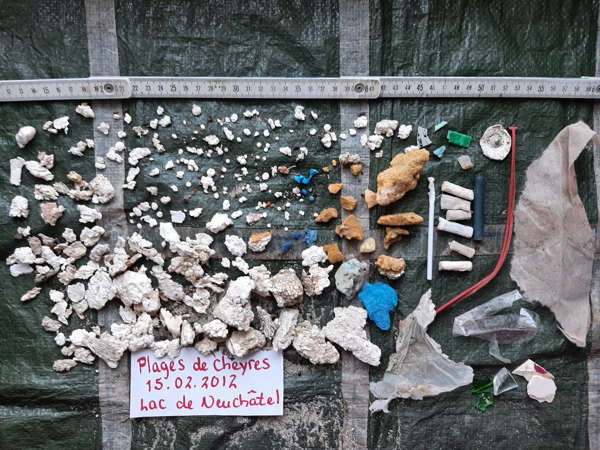

In [5]:
sut.display_image_ipython("resources/images/codegroups/20210221CheyresFoam.jpg", thumb=(600,1000), rotate=360)

*Various sizes of white expanded polystyrene and other foamed plastics*

In [6]:
wwcodes = dfCodes[dfCodes.code.isin(["G81", "G82", "G83"])][cols_to_display]
wwcodes

code                              description       groupname parent_code
190  G81  Foamed polystyrene pieces 0.5cm - 2.5cm  infrastructure        none
191  G82             Foam polystyrene  2.5 - 50cm  infrastructure        none
192  G83                Polystyrene pieces > 50cm  infrastructure        none

### Not applicable or omitted items

Of the 217 MSFD codes available 176 of the items were identified in the 2020-2021 surveys. Several items are not applicable to Swiss waters as they pertain to marine aquaculture production:

* G207 octopus pots
* G163 crab/lobster pots
* G215 food waste/galley waste*

*All naturally biodegradable food waste as well as feces collection and quantification was omitted from this project*.

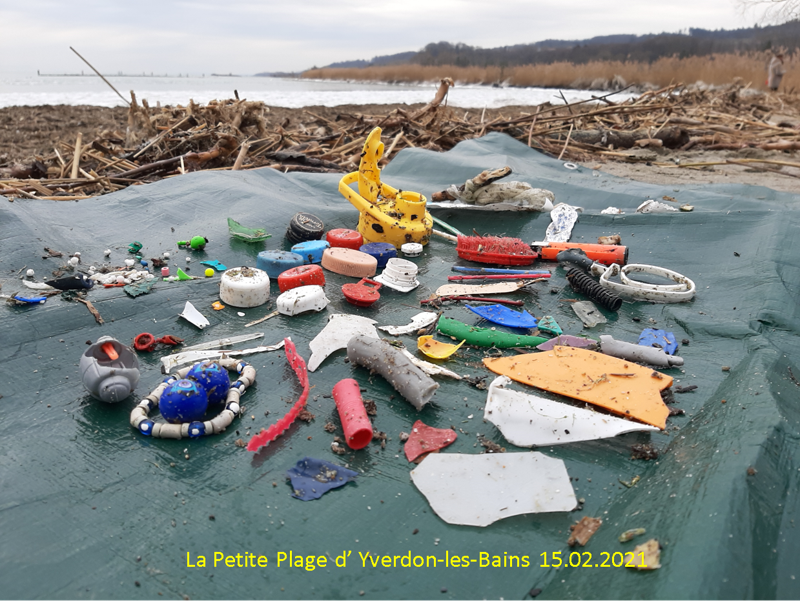

In [7]:
sut.display_image_ipython("resources/images/codegroups/petite_plage_yverdon_lesBains15_02_2021.png", thumb=(800,1200), rotate=0)

## Objects grouped by use 

Individual item codes have been grouped to best describe usage and possible sources. It is acknowledged that some items in a group contribute to a percentage rather than the whole sum. Code grouping is a broad analysis method to evaluate the discarded materials found in water systems by economic sectors or physical properties. Items are also analyzed independently in this report. The grouping is derived from field observations and research to determine possible sources of various pollutants.

1. wastewater: items released from water treatment plants includes items likely toilet flushed   
2. micro plastics (< 5mm): foams, plastic fragments and pre-production resins
3. infrastructure: items related to construction and maintenance of all buildings, roads and water/power supplies 
4. food/drink: primarily single use plastic items related to consuming food and drinks outdoors  
5. agriculture: mainly industrial sheeting for: mulch, row covers, greenhouses, soil fumigation and bale wraps includes hard plastics: agricultural fencing, plastic flower pots etc. 
6. tobacco: predominately cigarette filters, includes all smoking related material 
7. recreation: fishing, hunting, boating and beach related objects, excludes food, drink and tobacco   
8. packaging non food/drink: packaging or wrapping material not identifiable as food, drink nor tobacco related  
9. plastic pieces: plastic or foam/plastic composite pieces greater than 0.5 cm
10. personal items: personal use related; accessories, hygiene and clothing
11. Unclassified: ungrouped item codes



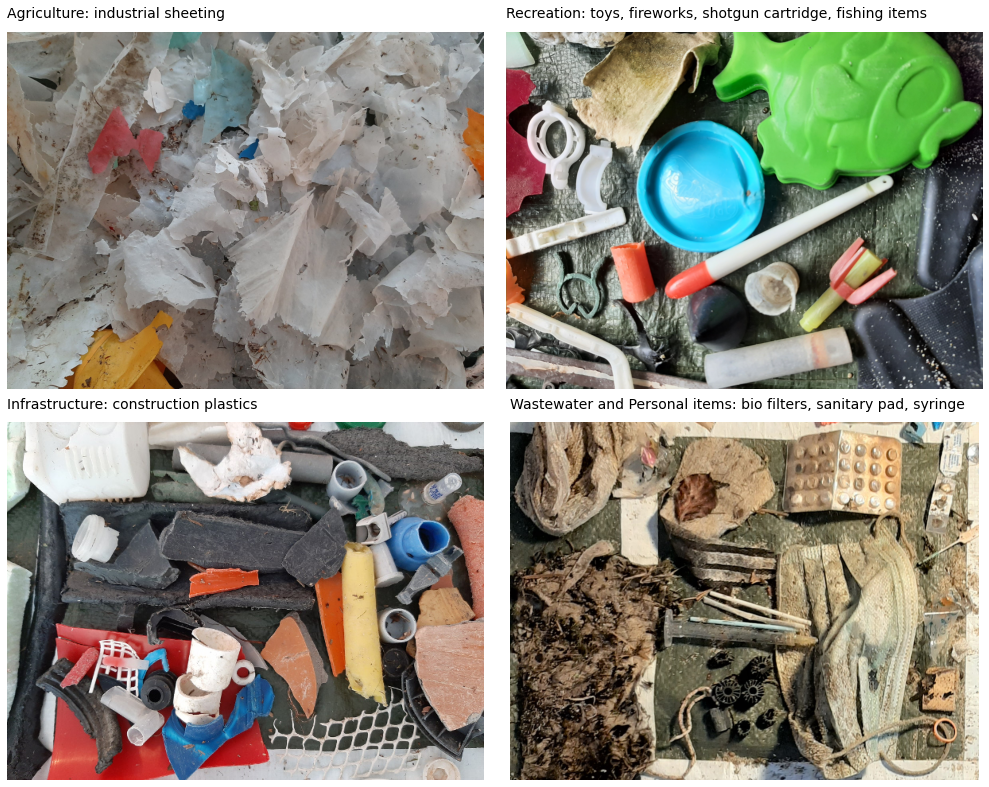

In [8]:
# read images
img_a = mpimg.imread("resources/images/codegroups/industrialsheeting_800_600.jpg")
img_b = mpimg.imread("resources/images/codegroups/20210419yverdon_rec.jpg")
img_c = mpimg.imread("resources/images/codegroups/infrastructure_450_600.jpg")
img_d = mpimg.imread("resources/images/codegroups/20201220_wt_pi_crop.jpg")

# display images
fig, ax = plt.subplots(2,2, figsize=(14,11))

axone=ax[0,0]
sut.hide_spines_ticks_grids(axone)
axone.imshow(img_a);
axone.set_title("Agriculture: industrial sheeting", **ck.title_k14)

axtwo=ax[0,1]
sut.hide_spines_ticks_grids(axtwo)
axtwo.imshow(img_b);
axtwo.set_title("Recreation: toys, fireworks, shotgun cartridge, fishing items", **ck.title_k14)

axthree=ax[1,0]
sut.hide_spines_ticks_grids(axthree)
axthree.imshow(img_c);
axthree.set_title("Infrastructure: construction plastics", **ck.title_k14)

axfour=ax[1,1]
sut.hide_spines_ticks_grids(axfour)
axfour.set_title("Wastewater and Personal items: bio filters, sanitary pad, syringe", **ck.title_k14)
axfour.imshow(img_d);

plt.tight_layout()
plt.show()

*Material grouping examples*

### Wastewater treatment 

Wastewater treatment codes includes toilet flushed plastic items such as cotton swabs and direct use items such as biomass holders. 

:::{note}
G98 includes diapers and wipes. Diapers are rarely found in Swiss water systems the quantities should be attributed to personal hygiene wipes.
:::

In [9]:
# group definition
wastewater = [
    "G91",
    "G95",
    "G96",
    "G98",
    "G97",
    "G100",
    "G133",
    "G932",
    "G144"
]

wwcodes = dfCodes[dfCodes.code.isin(wastewater)][cols_to_display]
wwcodes 

code                                        description    groupname  \
13   G144                                            Tampons  waste water   
78   G100               Medical; containers/tubes/ packaging  waste water   
208   G91                                     Biomass holder  waste water   
224  G932  Bio-beads, micro plastic for wastewater treatm...  waste water   
238   G95                             Cotton bud/swab sticks  waste water   
239   G96  Sanitary pads /panty liners/tampons and applic...  waste water   
240   G97                                  Toilet fresheners  waste water   
241   G98                                    Diapers - wipes  waste water   
251  G133                            Condoms incl. packaging  waste water   

    parent_code  
13         none  
78         none  
208        none  
224         G91  
238        none  
239        none  
240        none  
241        none  
251        none

### Micro plastics 

Micro codes are all micro plastics and foams from the _master list_ items G103-G123. Not all codes have been identified in our data.  The objective of this project was to quantify observable litter which tends to be greater than 0.5 cm but the lower limit of natural visible detection when surveying a shore line is around 2 - 5mm. 
Over the course of a survey, visible micro items are collected with the lager material and composition is generally identifiable. The IQAASL project did not include methods to specifically target items less than 5mm but all visible micro plastics collected during a survey were quantified, weighed and categorized using 20 codes available to classify plastics less than 5mm.

*Plastic objects less than 5mm*

In [10]:
# define group
codesmicro=["G112", "G106", "G117", "G103", "G104", "G105", "G107", "G108", "G109", "G110", "G111", "G113", "G114", "G115", "G116", "G118", "G119", "G120", "G121", "G122", "G123"]

# make table
wwcodes = dfCodes[dfCodes.code.isin(codesmicro)][cols_to_display]
wwcodes

code                        description               groupname  \
81   G103     Plastic fragments rounded <5mm  micro plastics (< 5mm)   
82   G104  Plastic fragments subrounded <5mm  micro plastics (< 5mm)   
83   G105  Plastic fragments subangular <5mm  micro plastics (< 5mm)   
84   G106     Plastic fragments angular <5mm  micro plastics (< 5mm)   
85   G107          Cylindrical pellets < 5mm  micro plastics (< 5mm)   
86   G108                 disk pellets  <5mm  micro plastics (< 5mm)   
87   G109                 Flat pellets  <5mm  micro plastics (< 5mm)   
89   G110                Ovoid pellets < 5mm  micro plastics (< 5mm)   
90   G111           Spheruloid pellets < 5mm  micro plastics (< 5mm)   
91   G112       Industrial pellets (nurdles)  micro plastics (< 5mm)   
92   G113                    Filaments  <5mm  micro plastics (< 5mm)   
93   G114                        Films  <5mm  micro plastics (< 5mm)   
94   G115               Foamed  plastic <5mm  micro plastics (< 5mm)   
95   G116                      Granules <5mm  micro plastics (< 5mm)   
96   G117                    Styrofoam < 5mm  micro plastics (< 5mm)   
97   G118      Small industrial spheres <5mm  micro plastics (< 5mm)   
98   G119      Sheetlike user plastic (>1mm)  micro plastics (< 5mm)   
100  G120    Threadlike user plastic ( >1mm)  micro plastics (< 5mm)   
101  G121        Foamed user plastic ( >1mm)  micro plastics (< 5mm)   
102  G122          Plastic fragments ( >1mm)  micro plastics (< 5mm)   
103  G123        Polyurethane granules < 5mm  micro plastics (< 5mm)   

    parent_code  
81         none  
82         none  
83         none  
84         none  
85         none  
86         none  
87         none  
89         none  
90         none  
91         none  
92         none  
93         none  
94         none  
95         none  
96         none  
97         none  
98         none  
100        none  
101        none  
102        none  
103        none

### Infrastructure 

Infrastructure relates to all forms of construction, renovations and maintenance of public and private structures including roads, bridges and ports as well as power and water supplies. Important quanties of construction plastics and especially foamed plastics were identified along all lakes of study. See survey results 2020-2021 [All surveys areas](allsurveys)

The most common construction plastics are pieces of piping, flexible and rigid hosings and cable protectors as well as associated connectors, fittings and covers. Also common are plastics used in concrete forming such as dowels, anchors and spacers. Some items associated with plastic construction have unique codes such as G93: _cable ties_  or G17: _injection gun containers_.

Other items in the infrastrucutre group have a more general use case:

* G186 Industrial scrap
* G194 Metal cables

#### Infrastrucutre: foamed plastics

All foamed plastics associated with insulation applications are attributed to the infrastructure group. Extruded foams are relatively dense multi colored foam boards and spray foams greater than 0.5 cm. Expanded polystyrene is included as infrastructure related due to the common use as an exterior insulator for above ground applications.  Additional codes were created to quantify size variations of foams, G909 - G912. The modifications were to differentiate construction insulation foams from packaging foams although both are used for a variety of applications. The material modifications to the foamed plastics is grouped to the _parent code_ for analysis and recorded separately. A detailed inventory of the type and size of foam is provided with each report. 

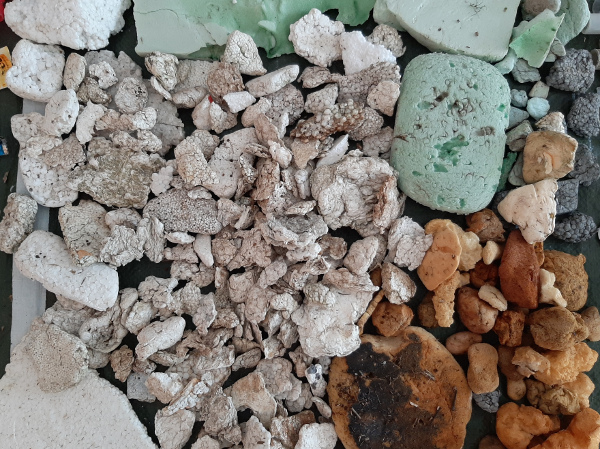

In [11]:
sut.display_image_ipython("resources/images/codegroups/fragfoam_450_600.jpg", thumb=(600, 1000), rotate=0)

*Various sizes of foamed plastics; XPS, EPS, and spray foams SPF along Swiss shorelines*

*Infrastructure group items*

In [12]:
# define group
construction2= [
            "G9",
            "G204",
            "G187",
            "G919",
            "G65",
            "G17",
            "G22",
            "G66",
            "G68",
            "G69",
            "G72",
            "G74",
            "G81",
            "G82",
            "G83",
            "G87",
            "G89",
            "G93",
            "G160",
            "G162",
            "G166",
            "G169",
            "G174",
            "G186",
            "G188",
            "G189",
            "G190",
            "G194",
            "G197",
            "G198",
            "G199",
            "G214",
            "G908",
            "G909",
            "G910",
            "G911",
            "G912",
            "G921",
            "G927",
            "G931"
]

wwcodes = dfCodes[dfCodes.code.isin(construction2)][cols_to_display]
wwcodes

code                                        description       groupname  \
3    G214                                            Oil/tar  infrastructure   
21   G204       Construction material; bricks, pipes, cement  infrastructure   
29   G921                            Ceramic tile and pieces  infrastructure   
30   G174                                 Aerosol spray cans  infrastructure   
42   G186                                   Industrial scrap  infrastructure   
43   G187                                              Drums  infrastructure   
44   G188                                   Other cans < 4 L  infrastructure   
45   G189               Gas bottles, drums and buckets > 4 L  infrastructure   
46   G190                                         Paint cans  infrastructure   
50   G194  Cables, metal wire(s) often inside rubber or p...  infrastructure   
53   G197                                        Other metal  infrastructure   
54   G198                          Other metal pieces < 50cm  infrastructure   
55   G199                          Other metal pieces > 50cm  infrastructure   
59   G919                          Nails, screws, bolts etc.  infrastructure   
109   G17                            Injection gun cartridge  infrastructure   
116   G22          Lids for chemicals, detergents (non-food)  infrastructure   
163   G65                                            Buckets     agriculture   
164   G66      Straps/bands;  hard, plastic package fastener  infrastructure   
166   G68                               Fiberglass fragments  infrastructure   
167   G69                                Helmets or hardhats  infrastructure   
180   G72                                      Traffic cones  infrastructure   
182   G74             Foam packaging/insulation/polyurethane  infrastructure   
190   G81            Foamed polystyrene pieces 0.5cm - 2.5cm  infrastructure   
191   G82                       Foam polystyrene  2.5 - 50cm  infrastructure   
192   G83                          Polystyrene pieces > 50cm  infrastructure   
196   G87                         Tape, masking/duct/packing  infrastructure   
198   G89                         Plastic construction waste  infrastructure   
199    G9             Cleaner, chemical bottles & containers  infrastructure   
206  G908                       Tape; electrical, insulating  infrastructure   
207  G909  Foamed plastic insulation, spray and foam boar...  infrastructure   
209  G910  Foamed plastic insulation, spray and foam boar...  infrastructure   
210  G911      Foam expanded polystyrene pieces 0.5 - 2.5 cm  infrastructure   
211  G912        Foam expanded polystyrene pieces 2.5 - 50cm  infrastructure   
219  G927  String trimmer line, used to cut grass, weeds,...  infrastructure   
221   G93               Cable ties; steggel, zip, zap straps  infrastructure   
223  G931  Tape-caution for barrier, police, construction...  infrastructure   
257  G160                                            Pallets  infrastructure   
259  G162                                             Crates  infrastructure   
263  G166                                      Paint brushes  infrastructure   
266  G169                                     Beams, dunnage  infrastructure   

    parent_code  
3          none  
21         none  
29         G204  
30         none  
42         none  
43         none  
44         none  
45         none  
46         none  
50         none  
53         none  
54         none  
55         none  
59         G197  
109        none  
116        none  
163        none  
164        none  
166        none  
167        none  
180        none  
182        none  
190        none  
191        none  
192        none  
196        none  
198        none  
199        none  
206        G124  
207         G74  
209         G74  
210         G81  
211         G82  
219        G124  
221        none  
223        G124  
257        none  
259        none  
263        none  
266 

### Food and drink 
Includes all materials associated with eating and drinking. The greatest quantities are single use plastics (SUP) items related to outdoor or to go consumption. Packaging for candy and snacks items G30 and broken glass G200 are the most prevalent along Swiss shorelines. See survey results 2020-2021 [All surveys areas](allsurveys)

In [13]:
foodstuff = [
    "G1",
    "G8",
    "G7",
    "G10",
    "G21",
    "G24",
    "G30",
    "G151",
    "G175",
    "G176",
    "G177",
    "G178",
    "G179",
    "G181",
    "G200",
    "G201",
    "G203",
    "G150",
    "G153",
    "G159",
    "G165",
    "G31",
    "G33",
    "G34",
    "G35",
    "G906",
    "G907",
    "G926",
    "G938"
    ]

wwcodes = dfCodes[dfCodes.code.isin(foodstuff)][cols_to_display]
wwcodes

code                                       description       groupname  \
17   G200                       Glass drink bottles, pieces  food and drink   
18   G201                             Jars, includes pieces  food and drink   
20   G203  Tableware ceramic or glass, cups, plates, pieces  food and drink   
31   G175                                    Cans, beverage  food and drink   
32   G176                                        Cans, food  food and drink   
33   G177                      Foil wrappers, aluminum foil  food and drink   
34   G178     Metal bottle caps, lids & pull tabs from cans  food and drink   
35   G179                                   Disposable BBQs  food and drink   
37   G181              Tableware metal;  cups, cutlery etc.  food and drink   
57   G906                          coffee capsules aluminum  food and drink   
66   G150                           Milk cartons, tetrapack  food and drink   
67   G151                               Cartons, Tetrapacks  food and drink   
69   G153           Cups, food containers, wrappers (paper)  food and drink   
76     G1                                    Six pack rings  food and drink   
77    G10      Food containers single use foamed or plastic  food and drink   
114   G21                                        Drink lids  food and drink   
118   G24     Lid/cap rings from plastic bottles/containers  food and drink   
125   G30                      Food wrappers; candy, snacks  food and drink   
126   G31                                   Lollypop sticks  food and drink   
128   G33    Cups, lids, single use foamed and hard plastic  food and drink   
129   G34                         Cutlery, plates and trays  food and drink   
130   G35                               Straws and stirrers  food and drink   
168    G7                            Drink bottles < = 0.5L  food and drink   
188    G8                             Drink bottles  > 0.5L  food and drink   
205  G907                           coffee capsules plastic  food and drink   
218  G926              Chewing gum, often contains plastics  food and drink   
230  G938                  Toothpicks, dental floss plastic  food and drink   
256  G159                                             Corks  food and drink   
262  G165          Ice cream sticks, toothpicks, chopsticks  food and drink   

    parent_code  
17         none  
18         none  
20         none  
31         none  
32         none  
33         none  
34         none  
35         none  
37         none  
57         G177  
66         none  
67         none  
69         none  
76         none  
77         none  
114        none  
118        none  
125        none  
126        none  
128        none  
129        none  
130        none  
168        none  
188        none  
205        G124  
218        G124  
230        G124  
256        none  
262        none

### Agriculture

Several codes were added to identify items pertaining to agriculture such as G937: _plastic pheromone baits_ commonly used in vineyards and G943: _plastic fencing_ associated with seasonal animal pasturing. The specific sheeting code G936: _greenhouse films and silage wrap_ was added for a particular type of product where the agriculture use is identifiable. 

Industrial sheeting (G67) is a broad category that includes plastic sheets and films that are flat pieces of plastic formed to a precise thickness for use in specific applications. Products differ in terms of materials, properties, and dimensions {cite}`globalspec`.
Isolating agricultural plastic sheeting use is difficult as the same plastics are utilized extensively in the packaging and construction sectors. Predominately along Swiss shorelines plastic sheeting and films are extremely weathered and fragmented making definitive use and origin difficult to determine.

Industrial sheeting is attributed to the agriculture group due to continious exposure to physical elements and use in close proximity to  rivers, streams and canals. Industrial sheeting is also attributed to agriculture due to the continuously increasing use of plastic materials in agricultural applications commonly referred to as plasticulture.
Plasticulture includes irrigation tubing, plastic nursery pots, and an extensive use of sheeting, wraps and films for horticultural, grain crops and dairy sectors {cite}`plasticulture`.

Plasticulture sheeting and films G67:

* mulch film
* row coverings
* polytunnels
* plastic greenhouses
* soil fumigation films
* silage bale wrap


In [14]:
ag2 = [
    "G36",
    "G936",
    "G937",
    "G13",
    "G18", 
    "G41",
    "G65",
    "G67",
    "G90",
    "G140",
    "G161",
    "G168",
    "G170",
    "G171",
    "G172",
    "G191",
    "G192",
    "G934",
    "G943"
]

wwcodes = dfCodes[dfCodes.code.isin(ag2)][cols_to_display]
wwcodes 

code                                        description    groupname  \
9    G140                Bags, burlap, hessian, jute or hemp  agriculture   
47   G191                                      Wire and mesh  agriculture   
48   G192                                            Barrels  agriculture   
105   G13  Bottles, containers, drums to transport, store...  agriculture   
110   G18                                     Crates/baskets  agriculture   
131   G36  Bags/sacks heavy duty plastic for 25 Kg or mor...  agriculture   
137   G41                      Glove industrial/professional  agriculture   
163   G65                                            Buckets  agriculture   
165   G67                                Industrial sheeting  agriculture   
200   G90                                Plastic flower pots  agriculture   
226  G934  Sandbag, plastic for flood, erosion control etc..  agriculture   
228  G936                       Sheeting ag. greenhouse film  agriculture   
229  G937                      Pheromone baits for vineyards  agriculture   
236  G943                       Fencing agriculture, plastic  agriculture   
258  G161                                   Processed timber  agriculture   
265  G168                                        Wood boards  agriculture   
267  G170                                   Wood (processed)  agriculture   
268  G171                                  Other wood < 50cm  agriculture   
269  G172                                  Other wood > 50cm  agriculture   

    parent_code  
9          none  
47         none  
48         none  
105        none  
110        none  
131        none  
137        none  
163        none  
165        none  
200        none  
226        G124  
228         G67  
229        G124  
236        G124  
258        none  
265        none  
267        none  
268        none  
269        none

### Tobacco codes

All tobacco related items.

In [16]:
tobac = [
    "G25",
    "G26",
    "G27",
    "G152"
    ]

wwcodes = dfCodes[dfCodes.code.isin(tobac)][cols_to_display]
wwcodes

code                                       description groupname  \
68   G152  Cigarette boxes, tobacco related paper/cardboard   tobacco   
119   G25            Tobacco; plastic packaging, containers   tobacco   
120   G26                                Cigarette lighters   tobacco   
121   G27                                 Cigarette filters   tobacco   

    parent_code  
68         none  
119        none  
120        none  
121        none

### Recreation codes

The recreational group includes fishing, hunting, boating and beach related objects, excludes food, drink and tobacco. Plastic shotgun cartridges (G70) are found in surprising numbers considering hunting is not allowed along public beaches and maybe a key indicator of travel distances through the water systems.

In [17]:
recreation = [
    "G32",
    "G43",
    "G48",
    "G49",
    "G50",
    "G49",
    "G51",
    "G52",
    "G53",
    "G54",
    "G53",
    "G55",
    "G56",
    "G57",
    "G58",
    "G59",
    "G60",
    "G61",
    "G63",
    "G70",
    "G73",
    "G86",
    "G92",
    "G94",
    "G206",
    "G132",
    "G142",
    "G143",
    "G155",
    "G164",
    "G167",
    "G182",
    "G183",
    "G125",
    "G126",
    "G11",
    "G213",
    "G904",
    "G940"
  ]

wwcodes = dfCodes[dfCodes.code.isin(recreation)][cols_to_display]
wwcodes

code                                        description   groupname  \
2    G213                                       Paraffin wax  recreation   
11   G142                              Rope , string or nets  recreation   
12   G143                                   Sails and canvas  recreation   
23   G206                                        Glass buoys  recreation   
38   G182       Fishing; hooks, weights, lures, sinkers etc.  recreation   
39   G183                                  Fish hook remains  recreation   
71   G155                Fireworks paper tubes and fragments  recreation   
88    G11             Cosmetics for the beach, e.g. sunblock  recreation   
127   G32                              Toys and party favors  recreation   
139   G43    Tags fishing or industry (security tags, seals)  recreation   
144   G48                                    Rope, synthetic  recreation   
145   G49                                         Rope > 1cm  recreation   
147   G50                                       String < 1cm  recreation   
148   G51                                        Fishing net  recreation   
149   G52                                    Nets and pieces  recreation   
150   G53                             Nets and pieces < 50cm  recreation   
151   G54                             Nets and pieces > 50cm  recreation   
152   G55                           Fishing line (entangled)  recreation   
153   G56                                       Tangled nets  recreation   
154   G57                                         Fish boxes  recreation   
155   G58                                      Foam fish box  recreation   
156   G59                Fishing line monofilament (angling)  recreation   
158   G60                                       Light sticks  recreation   
159   G61                              Other fishing related  recreation   
161   G63                                              Buoys  recreation   
169   G70                                 Shotgun cartridges  recreation   
181   G73  Foamed items & pieces (non packaging/insulatio...  recreation   
195   G86                                          Fin trees  recreation   
203  G904  Fireworks; rocket caps, exploded parts & packa...  recreation   
215   G92                                    Bait containers  recreation   
232   G94                                        Table cloth  recreation   
233  G940  Foamed EVA (flexible plastic) for crafts & wat...  recreation   
243  G125                        Balloons and balloon sticks  recreation   
244  G126                                              Balls  recreation   
250  G132                                  Bobbers (fishing)  recreation   
261  G164                                         Fish boxes  recreation   
264  G167                               Matches or fireworks  recreation   

    parent_code  
2          none  
11         none  
12         none  
23         none  
38         none  
39         none  
71         none  
88         none  
127        none  
139        none  
144        none  
145        none  
147        none  
148        none  
149        none  
150        none  
151        none  
152        none  
153        none  
154        none  
155        none  
156        none  
158        none  
159        none  
161        none  
169        none  
181        none  
195        none  
203        G124  
215        none  
232        none  
233         G73  
243        none  
244        none  
250        none  
261        none  
264        none

### Packaging not related to food, drink, tobacco or unknown origin.
All  packaging or wrapping material including paper, plastic and metal not identified as food, drink nor tobacco related. The packaging non food/drink group includes (G941) a code added  to differentiate thin packaging films from thicker industrial sheeting. The plastic packaging films (G941) are classified as non food, drink, nor tobacco related. Commonly the films are highly deteriorated and fragmented making the original use and source difficult to determine.




*Packaging not related to tobacco or food and drink or origin unknown*

In [18]:
packaging = [
    "G23",
    "G2",
    "G146",
    "G148",
    "G149", 
    "G3", 
    "G20",
    "G4",
    "G6",
    "G147",
    "G922",
    "G941",
    "G156",
    "G157",
    "G158",
    "G925",
    "G5"
    ]

wwcodes = dfCodes[dfCodes.code.isin(packaging)][cols_to_display]
wwcodes.loc[wwcodes.code == "G925", "description"] = "Dessicants/moisture absorbers"
wwcodes

code                                        description  \
62   G146                                   Paper, cardboard   
63   G147                                         Paper bags   
64   G148                    Cardboard (boxes and fragments)   
65   G149                                    Paper packaging   
72   G156                                    Paper fragments   
73   G157                                              Paper   
74   G158                                  Other paper items   
112    G2                                               Bags   
113   G20                                      Caps and lids   
117   G23                                  Lids unidentified   
124    G3  Bags; plastic shopping/carrier/grocery and pieces   
135    G4         Small plastic bags; freezer, zip-lock etc.   
146    G5                               Generic plastic bags   
157    G6     Bottles and containers, plastic non food/drink   
216  G922                                  Labels, bar codes   
217  G925                      Dessicants/moisture absorbers   
234  G941                 Packaging films nonfood or unknown   

              groupname parent_code  
62   packaging non food        none  
63   packaging non food        none  
64   packaging non food        none  
65   packaging non food        none  
72   packaging non food        none  
73   packaging non food        none  
74   packaging non food        none  
112  packaging non food        none  
113  packaging non food        none  
117  packaging non food        none  
124  packaging non food        none  
135  packaging non food        none  
146  packaging non food        none  
157  packaging non food        none  
216  packaging non food        G124  
217  packaging non food        G124  
234  packaging non food        G124

### Fragmented plastics: Gfrags

The plastic fragments group (Gfrags for analysis) are all plastic and foam/plastic composite pieces greater than 0.5 cm. Plastic pieces found along Swiss shorelines are predominately small, hard, highly fragmented pieces of a pigmented item. The original use and source is principally undetermined. Individual plastic pieces were quantified by material and size:

*Fragmented plastics code group, Gfrags*

In [19]:
plasticpcs = [
    "G78",
    "G79",
    "G80",
    "G75", 
    "G76", 
    "G77" 
    ]

wwcodes = dfCodes[dfCodes.code.isin(plasticpcs)][cols_to_display]
wwcodes

code                            description       groupname parent_code
183  G75   Plastic/polystyrene pcs 0.5 - 2.5 cm  plastic pieces        none
184  G76  Plastic/foamed polystyrene 2.5 > < 50  plastic pieces        none
185  G77         Plastic or polystyrene  > 50cm  plastic pieces        none
186  G78           Plastic pieces 0.5cm - 2.5cm  plastic pieces        none
187  G79            Plastic pieces 2.5cm - 50cm  plastic pieces        none
189  G80                  Plastic pieces > 50cm  plastic pieces        none

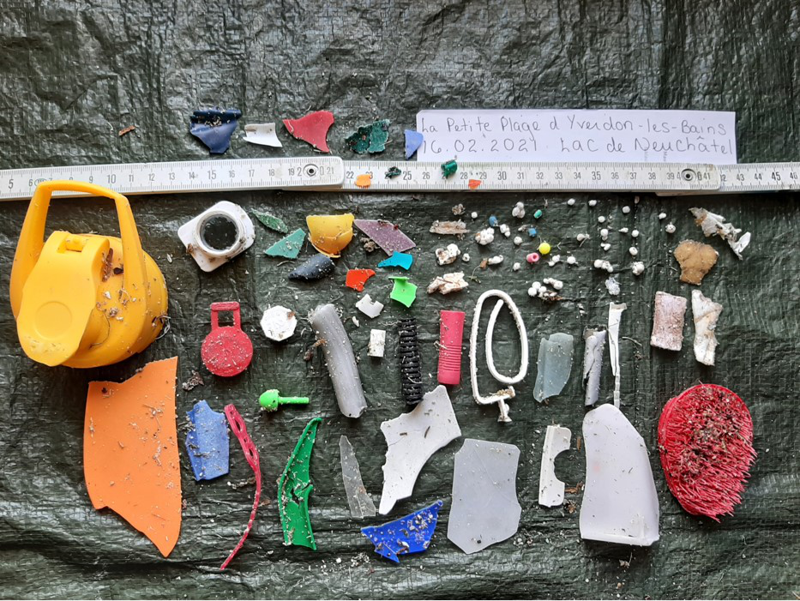

In [20]:
sut.display_image_ipython("resources/images/codegroups/Yverdon_lesBainsLacNeuchâtel15_02_2021.jpg", thumb=(800, 1200), rotate=0)

*Various sizes of plastic pieces*

### Personal Items

Includes accessories, hygiene and clothing related items lost or discarded. Includes pandemic related items such as face masks as well as beach related items such as sunglasses and clothing.

Additional MSFD and IQAASL codes related to personal items:

* G923 tissue, toilet paper, napkins, paper towels Parent code (G158) Other paper items
* G96 sanitary towels, pantyliners modified to include tampon applicators
* G100 medical, pharmaceutical containers and tubes

*Personal items*

In [21]:
pi = [
    "G211",
    "G84",
    "G99",
    "G101",
    "G102",
    "G127",
    "G131",
    "G135",
    "G136",
    "G137",
    "G138",
    "G139",
    "G37",
    "G39",
    "G40",
    "G145",
    "G28",
    "G29",
    "G154",
    "G195",
    "G900",
    "G901",
    "G902",
    "G903",
    "G905",
    "G913",
    "G914",
    "G915",
    "G918",
    "G916",
    "G933",
    "G929",
    "G939",
    "G945",
    "G923",
    "G928",
    "G12",
    "G71",
    "G88",
    "G935",
    "G930"
    ]
wwcodes = dfCodes[dfCodes.code.isin(pi)][cols_to_display]
wwcodes

code                                        description       groupname  \
4    G135                Clothes, footware, headware, gloves  personal items   
5    G136                                              Shoes  personal items   
6    G137                            Clothing, towels & rags  personal items   
7    G138                                  Shoes and sandals  personal items   
8    G139                                          Backpacks  personal items   
14   G145                                     Other textiles  personal items   
16   G902                                Mask medical, cloth  personal items   
51   G195                              Batteries - household  personal items   
58   G918  Safety pins, paper clips, small metal utility ...  personal items   
60   G929     Electronics and pieces; sensors, headsets etc.  personal items   
61   G945                                       Razor blades  personal items   
70   G154                            Newspapers or magazines  personal items   
75   G923        Tissue, toilet paper, napkins, paper towels  personal items   
79   G101                                      Dog feces bag  personal items   
80   G102                                         Flip-flops  personal items   
99    G12  Cosmetics, non-beach use personal care containers  personal items   
115  G211  Other medical (swabs, bandaging, adhesive plas...  personal items   
122   G28                Pens, lids, mechanical pencils etc.  personal items   
123   G29                      Combs, brushes and sunglasses  personal items   
132   G37                                          Mesh bags  personal items   
134   G39                                             Gloves  personal items   
136   G40                         Gloves household/gardening  personal items   
176   G71                                      Shoes sandals  personal items   
193   G84                                       CD or CD box  personal items   
197   G88                              Telephone incl. parts  personal items   
201  G901                            Mask medical, synthetic  personal items   
202  G903                Hand sanitizer containers & packets  personal items   
204  G905  Hair clip,  hair ties, personal accessories pl...  personal items   
212  G913                                           Pacifier  personal items   
213  G914     Paperclips, clothespins, plastic utility items  personal items   
214  G915                 Reflectors, plastic mobility items  personal items   
220  G928                                   Ribbons and bows  personal items   
222  G930                                      Foam earplugs  personal items   
225  G933  Bags, cases for accessories; glasses, electron...  personal items   
227  G935  Walking stick pads and pieces, often elastomer...  personal items   
231  G939                            Flowers, plants plastic  personal items   
242   G99                                 Syringes - needles  personal items   
245  G127                                       Rubber boots  personal items   
249  G131                                       Rubber bands  personal items   
253  G900        Gloves latex  personal protective equipment  personal items   
272  G916                                 Pencils and pieces  personal items   

    parent_code  
4          none  
5          none  
6          none  
7          none  
8          none  
14         none  
16         G145  
51         none  
58         G198  
60         G198  
61         G198  
70         none  
75         G158  
79         none  
80         none  
99         none  
115        none  
122        none  
123        none  
132        none  
134        none  
136        none  
176        none  
193        none  
197        none  
201        G124  
202         G12  
204        G124  
212        G124  
213        G124  
214        G124  
220        G124  
222        G124  
225        G124  
227        G12

### Unclassified items 

The non grouped codes are predominately items that are ambiguous in origin, rarely identified, or do not pertain to shoreline surveillance of Swiss water systems. Many of the non grouped items have a total value of 0 for all survey data included in this report.

Notable exceptions are G20 and G23 plastic caps/lids unidentified which are found in significant quantities but use and origin are unknown.

Glass or ceramic fragments >2.5cm G208 is also unclassified in this report. Predominately ceramic pieces of unknown use or origin are identified frequently and in relatively high concentrations. The occurrence of ceramic fragments may be related to the sources of material for beach replenishing practices as well as natural transport and deposition processes rather than food and drink or other beach related activities. Identifiable glass drink bottles and pieces are classified as (G200) bottles and includes pieces, they are grouped with food and drink.

In [22]:
wwcodes = dfCodes[dfCodes.groupname == "unclassified"][cols_to_display]
wwcodes.loc[wwcodes.code == "G38", "description"] = "Coverings sheeting for protecting large cargo items"
wwcodes 

code                                        description     groupname  \
1    G212    Oil nodules or coal fragments -- not from a BBQ  unclassified   
10   G141                                             Carpet  unclassified   
19   G202                                        Light bulbs  unclassified   
22   G205                            Fluorescent light tubes  unclassified   
24   G207                                       Octopus pots  unclassified   
25   G208                Glass or ceramic fragments > 2.5 cm  unclassified   
26   G209                                Large glass objects  unclassified   
27   G210                                Other glass/ceramic  unclassified   
28   G917                                   Terracotta balls  unclassified   
36   G180                                         Appliances  unclassified   
40   G184                                       Lobster pots  unclassified   
41   G185                             Middle size containers  unclassified   
49   G193                            car parts and batteries  unclassified   
52   G196                             Large metallic objects  unclassified   
104  G124                     Other plastic or foam products  unclassified   
106   G14                                 Engine oil bottles  unclassified   
107   G15                          Engine oil bottles > 50cm  unclassified   
108   G16                                         Jerry cans  unclassified   
111   G19                                          Car parts  unclassified   
133   G38  Coverings sheeting for protecting large cargo ...  unclassified   
138   G42                                  Crab lobster pots  unclassified   
140   G44                                       Octopus pots  unclassified   
141   G45                                        Mussel nets  unclassified   
142   G46                                       Oyster trays  unclassified   
143   G47                       Sheeting from mussel culture  unclassified   
160   G62                                    Floats for nets  unclassified   
162   G64                                            Fenders  unclassified   
170  G700                  The results from a clean up event  unclassified   
194   G85                                     Salt packaging  unclassified   
235  G942        Plastic shavings from lathes, CNC machining  unclassified   
237  G944                 Pellet mass from injection molding  unclassified   
246  G128                                    Tires and belts  unclassified   
247  G129                      Inner tubes and rubber sheets  unclassified   
248  G130                                             Wheels  unclassified   
252  G134                                       Other rubber  unclassified   
254  G998                               No exposed shoreline  unclassified   
255  G999                    No objects found on this survey  unclassified   
260  G163                                  Crab lobster pots  unclassified   
270  G173                                              Other  unclassified   

    parent_code  
1          none  
10         none  
19         none  
22         none  
24         none  
25         none  
26         none  
27         none  
28         G210  
36         none  
40         none  
41         none  
49         none  
52         none  
104        none  
106        none  
107        none  
108        none  
111        none  
133        none  
138        none  
140        none  
141        none  
142        none  
143        none  
160        none  
162        none  
170        G700  
194        none  
235        G124  
237        G112  
246        none  
247        none  
248        none  
252        none  
254        none  
255        none  
260        none  
270        none

## List of additional codes

*local codes added for Swiss water systems*

In [23]:
addcodes = [
    "G900", 
    "G901", 
    "G902", 
    "G903", 
    "G904", 
    "G905",
    "G906", 
    "G907", 
    "G908", 
    "G909", 
    "G910", 
    "G911", 
    "G912", 
    "G913", 
    "G914", 
    "G915", 
    "G916", 
    "G917", 
    "G918", 
    "G919", 
    "G920", 
    "G921", 
    "G922", 
    "G923", 
    "G925", 
    "G926", 
    "G927", 
    "G928", 
    "G929", 
    "G930",
    "G931",
    "G932",
    "G933",
    "G934",
    "G935",
    "G936",
    "G937",
    "G938",
    "G939",
    "G940",
    "G941",
    "G942",
    "G943",
    "G944",
    "G945"
]

wwcodes = dfCodes[dfCodes.code.isin(addcodes)][cols_to_display]
wwcodes.loc[wwcodes.code == "G933", "description"] = "Bags cases for accesories"
wwcodes.loc[wwcodes.code == "G932", "description"] = "Biomass beads for waste water treatment"

wwcodes

code                                        description  \
16   G902                                Mask medical, cloth   
28   G917                                   Terracotta balls   
29   G921                            Ceramic tile and pieces   
57   G906                           coffee capsules aluminum   
58   G918  Safety pins, paper clips, small metal utility ...   
59   G919                          Nails, screws, bolts etc.   
60   G929     Electronics and pieces; sensors, headsets etc.   
61   G945                                       Razor blades   
75   G923        Tissue, toilet paper, napkins, paper towels   
201  G901                            Mask medical, synthetic   
202  G903                Hand sanitizer containers & packets   
203  G904  Fireworks; rocket caps, exploded parts & packa...   
204  G905  Hair clip,  hair ties, personal accessories pl...   
205  G907                            coffee capsules plastic   
206  G908                       Tape; electrical, insulating   
207  G909  Foamed plastic insulation, spray and foam boar...   
209  G910  Foamed plastic insulation, spray and foam boar...   
210  G911      Foam expanded polystyrene pieces 0.5 - 2.5 cm   
211  G912        Foam expanded polystyrene pieces 2.5 - 50cm   
212  G913                                           Pacifier   
213  G914     Paperclips, clothespins, plastic utility items   
214  G915                 Reflectors, plastic mobility items   
216  G922                                  Labels, bar codes   
217  G925  Packets: desiccant/ moisture absorbers, plasti...   
218  G926               Chewing gum, often contains plastics   
219  G927  String trimmer line, used to cut grass, weeds,...   
220  G928                                   Ribbons and bows   
222  G930                                      Foam earplugs   
223  G931  Tape-caution for barrier, police, construction...   
224  G932            Biomass beads for waste water treatment   
225  G933                          Bags cases for accesories   
226  G934  Sandbag, plastic for flood, erosion control etc..   
227  G935  Walking stick pads and pieces, often elastomer...   
228  G936                       Sheeting ag. greenhouse film   
229  G937                      Pheromone baits for vineyards   
230  G938                   Toothpicks, dental floss plastic   
231  G939                            Flowers, plants plastic   
233  G940  Foamed EVA (flexible plastic) for crafts & wat...   
234  G941                 Packaging films nonfood or unknown   
235  G942        Plastic shavings from lathes, CNC machining   
236  G943                       Fencing agriculture, plastic   
237  G944                 Pellet mass from injection molding   
253  G900        Gloves latex  personal protective equipment   
272  G916                                 Pencils and pieces   

              groupname parent_code  
16       personal items        G145  
28         unclassified        G210  
29       infrastructure        G204  
57       food and drink        G177  
58       personal items        G198  
59       infrastructure        G197  
60       personal items        G198  
61       personal items        G198  
75       personal items        G158  
201      personal items        G124  
202      personal items         G12  
203          recreation        G124  
204      personal items        G124  
205      food and drink        G124  
206      infrastructure        G124  
207      infrastructure         G74  
209      infrastructure         G74  
210      infrastructure         G81  
211      infrastructure         G82  
212      personal items        G124  
213      personal items        G124  
214      personal items        G124  
216  packaging non food        G124  
217  packaging non food        G124  
218      food and drink        G124  
219      infrastructure        G124  
220      personal items        G124  
222      personal items        G124  
223      infrastructur

## Local codes added for Swiss alps

In [24]:
alpcodes = [
    "G708", 
    "G712", 
    "G705", 
    "G703", 
    "G704",
    "G706", 
    "G707", 
    "G709", 
    "G710", 
    "G711", 
    "G713", 
    "G702"
]

wwcodes = dfCodes[dfCodes.code.isin(alpcodes)][cols_to_display]
wwcodes.loc[wwcodes.code == "G933", "description"] = "Bags cases for accesories"
wwcodes.loc[wwcodes.code == "G932", "description"] = "Biomass beads for waste water treatment"

wwcodes

code                                        description       groupname  \
0    G708                                      Batons de ski      recreation   
15   G712                                       Gants de ski      recreation   
56   G705                                   Screws and bolts  infrastructure   
171  G703                                piquet de ballisage  infrastructure   
172  G704                                Brosse de télésiège  infrastructure   
173  G706                                  Abonnement de ski      recreation   
174  G707                      étiquette d’équipement de ski      recreation   
175  G709        Batons de ski parties (rondelles, attaches)      recreation   
177  G710  Ski / Snowboards (ski, fixations et autres piè...      recreation   
178  G711                                       Chaufferette      recreation   
179  G713                               Carpet from ski lift  infrastructure   
271  G702                                piquet de ballisage  infrastructure   

    parent_code  
0          G199  
15         G135  
56         G197  
171        G124  
172        G124  
173        G124  
174        G124  
175        G124  
177         G79  
178        G124  
179        G124  
271        G173

In [25]:
# hmm = dfAgg.copy()
# hmm = hmm[["code","quantity"]].groupby("code", as_index=False).quantity.sum()

# found = hmm[hmm.quantity > 0].code.unique()

# ahh=[code for code in dfCodes.code if code not in found]

# # saving to .json
# # push_this_to_json(filename=F"{project_directory}/codeNotfound.json", data=ahh)

# dfCodes[dfCodes.source_two == "cons"]
# figname = F"codes_with_groups.csv"
# filename=F"{output}/code_groups/{figname}"
# dfCodes.to_csv(filename, index=None) 